# Networ-decentralized control strategy

In [36]:
import numpy as np 
import cvxpy as cvx
from graph import latex

### Matrices $B$ and $E$

In [44]:
B_i = np.array([[0],[1]])
B_0 = np.zeros((2,1))

B = np.block([[-B_i, B_0, B_0, B_i, -B_i, B_0, B_0, B_0, B_0, B_0, B_0 ],
              [ B_i, B_i, B_i, B_0, B_0, B_i, -B_i, B_0, B_0, B_0, B_0 ],
              [ B_0, B_0, -B_i, B_0, B_0, B_0, B_0, B_i, B_0, B_0, B_0 ],
              [ B_0, B_0, B_0, -B_i, B_0, B_0, B_0, B_0, B_i, B_0, B_i ],
              [ B_0, B_0, B_0, B_0, B_i, -B_i, B_0, B_0, -B_i, B_i, B_0],
              [ B_0, B_0, B_0, B_0, B_0, B_0, B_i, -B_i, B_0, -B_i, B_0]
            ])

A_i = np.array([[0,1],[0,0]])
A_0 = np.zeros((2,2))

A = np.block([[A_i,A_0,A_0,A_0,A_0,A_0],
              [A_0,A_i,A_0,A_0,A_0,A_0],
              [A_0,A_0,A_i,A_0,A_0,A_0],
              [A_0,A_0,A_0,A_i,A_0,A_0],
              [A_0,A_0,A_0,A_0,A_i,A_0],
              [A_0,A_0,A_0,A_0,A_0,A_i]])

E_i = np.array([0,1])
E_0 = np.zeros(2)

E = - np.block([E_i,E_0,E_i,E_0,E_i,E_i])

In [38]:
A = np.matrix(A)
B = np.matrix(B)

In [39]:
display(latex(A),latex(B),latex(E))

Matrix([
[0, 1.0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0, 1.0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0, 1.0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0, 1.0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0, 1.0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0, 1.0],
[0,   0, 0,   0, 0,   0, 0,   0, 0,   0, 0,   0]])

Matrix([
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[-1.0,   0,    0,  1.0, -1.0,    0,    0,    0,    0,    0,   0],
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[ 1.0, 1.0,  1.0,    0,    0,  1.0, -1.0,    0,    0,    0,   0],
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[   0,   0, -1.0,    0,    0,    0,    0,  1.0,    0,    0,   0],
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[   0,   0,    0, -1.0,    0,    0,    0,    0,  1.0,    0, 1.0],
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[   0,   0,    0,    0,  1.0, -1.0,    0,    0, -1.0,  1.0,   0],
[   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,   0],
[   0,   0,    0,    0,    0,    0,  1.0, -1.0,    0, -1.0,   0]])

Matrix([
[   0],
[-1.0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[   0],
[   0],
[-1.0],
[   0],
[-1.0]])

### Network-decntralized feedBack control

#### Analitical solution

According to the paper "Structure-LMI conditions for stabilizing network-decentralised control" is possible to find  matrices $S$,$R$, with $S$ positive define, that satisfies the condition:

$$ A\, S + S \, A - B \, R - R^T \, B^T < 0$$

then exist a stabilizing decentralized control
$$ u = - K \, x$$
with $K = R \, S^{-1}$

Original LMI was:

$$S \, A^T + A \, S - 2 \, \gamma \, B \, B^T <0$$

, but we change approach inorder to be able to work with cvxpy:

#### Numerical soution

### Evolution of the states

In [45]:
A = A + 0.15*np.eye(12)
latex(A)

Matrix([
[0.15,  1.0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0, 0.15,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0, 0.15,  1.0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0, 0.15,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0, 0.15,  1.0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0, 0.15,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0, 0.15,  1.0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0, 0.15,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0, 0.15,  1.0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0, 0.15,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 0.15,  1.0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 0.15]])

In [46]:
a = cvx.Parameter((12,12))
b = cvx.Parameter((12,11))
S = cvx.Variable((12,12))
R = cvx.Variable((11,12))
I = np.identity(12)


objective = cvx.Minimize(0)
prob = cvx.Problem(objective, [S - 0.1*I >> 0, a @ S + S @ a.T + b @ R + R.T @ b.T + 0.5*S << 0])

a.value = A 
b.value = B
prob.solve()


0.0

In [48]:
R_ = R.value
S_ = S.value

In [49]:
K = R_@np.linalg.inv(S_)
K.shape

(11, 12)

In [50]:
A_cl = (A + B@K)
np.linalg.eig(A_cl)[0]

array([-0.31928433+1.15304376j, -0.31928433-1.15304376j,
       -0.31971085+1.14188856j, -0.31971085-1.14188856j,
       -0.32155337+1.09509354j, -0.32155337-1.09509354j,
       -0.32112431+1.10579661j, -0.32112431-1.10579661j,
       -0.32027384+1.12736761j, -0.32027384-1.12736761j,
       -0.32056084+1.12004029j, -0.32056084-1.12004029j])

#### Analitical  solution

In [51]:
step = 100

x0 = np.zeros(12)
x  = x0.copy()
x.shape

A = np.array(A)
B = np.array(B)
K = np.array(K)

u = -K@x

dt = 0.001

x_plot = x0.copy()

for i in range(step):
    x = x + A@x*dt + B@u*dt + E*dt
    u = - K@x
    x_plot = np.append(x_plot, x, axis=0)


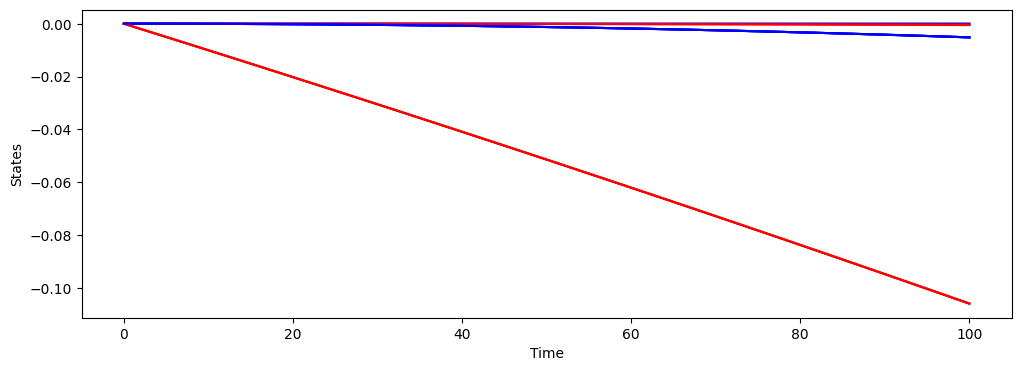

In [52]:

x_plot = np.reshape(x_plot, (step +1, len(x)))
import matplotlib.pyplot as plt
time = np.arange(0,step+1)
plt.figure(figsize=(12,4))
for i in range(x_plot.shape[1]-1):
    if i % 2 == 0:
        plt.plot(time,x_plot[:,i], '-', color='blue')
    if i % 2 != 0:
        plt.plot(time,x_plot[:,i], '-', color='red')
plt.xlabel("Time")
plt.ylabel("States")
plt.show()